In [1]:
from diagrams import Cluster, Diagram
from diagrams.aws.network import ElbApplicationLoadBalancer
from diagrams.aws.compute import Fargate
from diagrams.aws.database import RDSPostgresqlInstance
from diagrams.aws.database import RDSPostgresqlInstance
from diagrams.aws.compute import LambdaFunction

In [2]:
with Diagram("Cloud System Architecture", show=False, filename="diagram") as diag:
    alb = ElbApplicationLoadBalancer("ALB")

    with Cluster("Endpoints"):
        endpoints = [
            Fargate("RestAPI"),
            LambdaFunction("Lambda")
        ]

    # with Cluster("Services"):
    #     svc_group = [ECS("web1"),
    #                  ECS("web2"),
    #                  ECS("web3")]

    with Cluster("DB Cluster"):
        db_main = RDSPostgresqlInstance("Master")
        db_main - [RDSPostgresqlInstance("Read Replica")]

    alb >> endpoints >> db_main

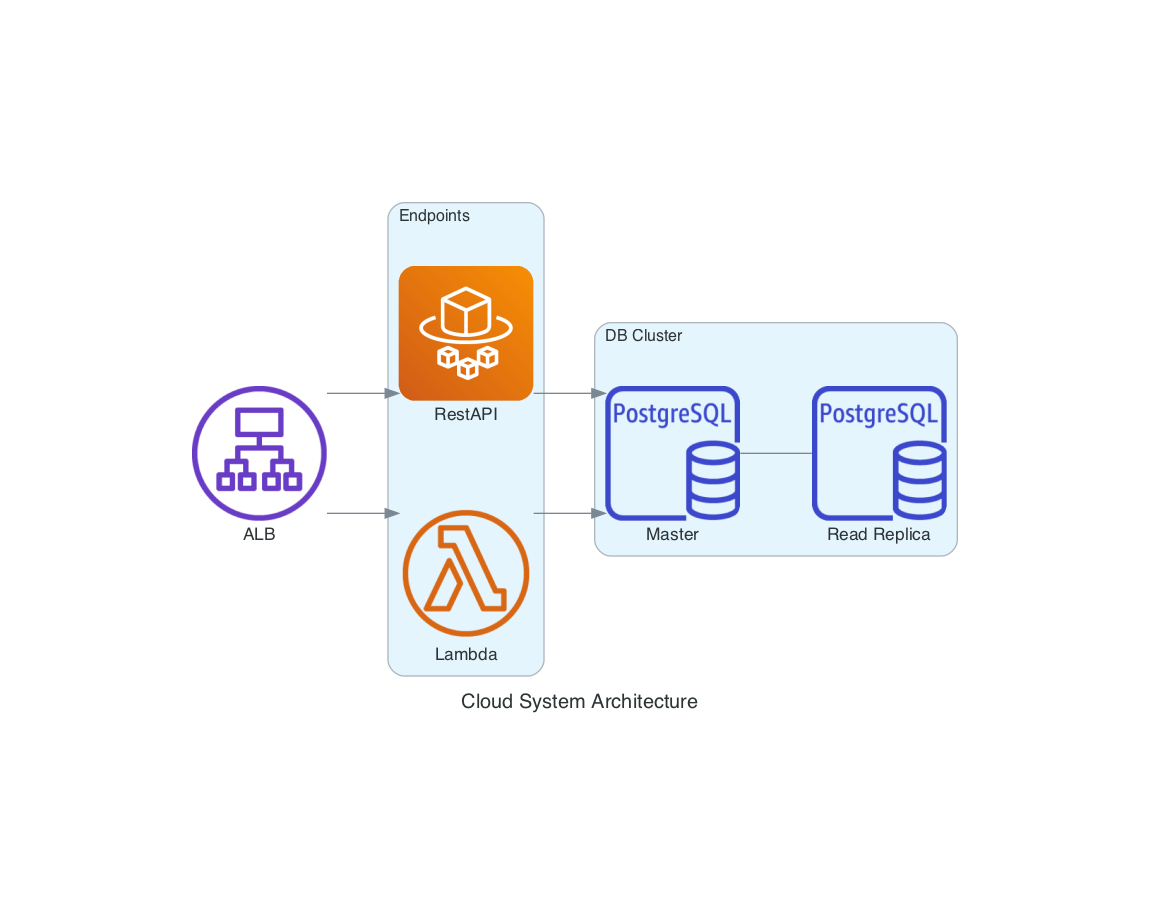

In [3]:
diag